# Data Science TP3 - PCA and KNN
Tien-Tso Ning

In [1]:
#Ning
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
#uses np.linalg.norm
#uses np.inner

In [2]:
#load MNIST dataset
(training_set, labels), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
all_images = np.reshape(training_set, (60000,784))
print(len(all_images))
print(all_images.shape)

60000
(60000, 784)


In [4]:
#prime the set of two's images
two_set = []
for i in range(0,len(labels)):
    if labels[i] == 2:
        two_set.append(all_images[i])
print(len(two_set))
two_set = two_set[0:5000]
print(len(two_set))
X = two_set[:]
print(X[0].shape)

5958
5000
(784,)


In [5]:
pca = PCA(n_components=784)
pca_onX = pca.fit(X)

In [6]:
#get 784 PCA components, which are each len 784 vectors
PC = pca_onX.components_
print(len(PC))
print(PC.shape)

784
(784, 784)


# 1. Principal Component Analysis
The first thing to do is to calculate $\hat{x}$, which is the average image.

In [53]:
#calculate x_bar with n = 5000
x_bar = np.mean(X, axis=0)

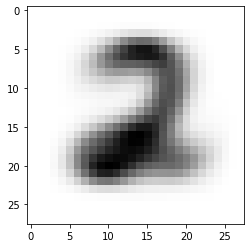

In [8]:
x_bar_show = np.reshape(x_bar, (28,28))
plt.imshow(x_bar_show, cmap='Greys')

Here we can see that our average image is reasonable. it looks like a 2.

In [27]:
def reconstruct(x_i, m, x_bar, PC):
    '''
    reconstruct x_i from X, where x_i is a len 784 vector image.
    '''
    recon = np.zeros((784,))
    for j in range(0, m):
        recon += np.inner((x_i-x_bar), PC[j])*PC[j]
    recon = recon + x_bar
    return recon

Reconstruction is done by taking x<sub>i</sub>, the image we are reconstructing, subtracting the $\hat{x}$, and then applying the innerproduct between the subtraction and the principal components. The principal components are then multiplied and the average image is added.

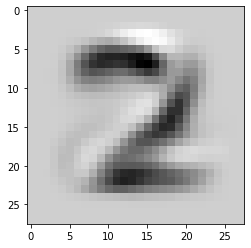

In [46]:
#try to see the reconstructed image
recon_test = np.reshape(reconstruct(X[3], 10, x_bar, PC), (28,28))
#x_bar_show = np.reshape(x_bar, (28,28))
plt.imshow(recon_test, cmap="Greys")

Here, I am not exactly sure why our reconstruction is not improving when we utilize more of the principal components. The reconstruction also seems like it is just the average image. However, The error should be improving dramatically when we add the first few principal components since the first few principal components define the most features of the original image, up until the error is around 50%, and then we should start seeing the error plateau even as we add more principal components since the principal components later only explain very minute features of the original image. Until adding all 784 principal components will just yield the original image and fully reconstruct it.

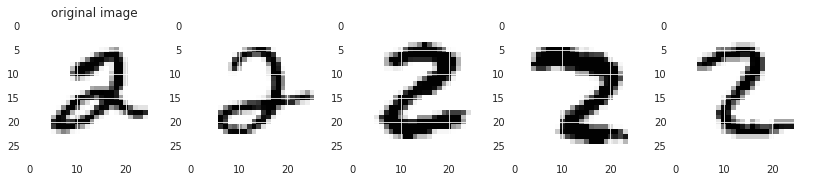

In [29]:
#graph reconstructions
f = plt.figure(figsize=(14,4))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,5,1)
    plt.imshow(np.reshape(X[0], (28,28)), cmap="Greys")
    ax.title.set_text("original image")
    ax = f.add_subplot(1,5,2)
    plt.imshow(np.reshape(X[1], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,5,3)
    plt.imshow(np.reshape(X[2], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,5,4)
    plt.imshow(np.reshape(X[3], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,5,5)
    plt.imshow(np.reshape(X[4], (28,28)), cmap="Greys")

In [30]:
images_x0 = []
for m in range(1,11):
    images_x0.append(reconstruct(X[0],m,x_bar,PC))
images_x1 = []
for m in range(1,11):
    images_x1.append(reconstruct(X[1],m,x_bar,PC))
images_x2 = []
for m in range(1,11):
    images_x2.append(reconstruct(X[2],m,x_bar,PC))
images_x3 = []
for m in range(1,11):
    images_x3.append(reconstruct(X[3],m,x_bar,PC))
images_x4 = []
for m in range(1,11):
    images_x4.append(reconstruct(X[4],m,x_bar,PC))

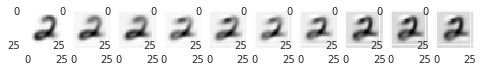

In [31]:
f = plt.figure(figsize=(8,4))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,10,1)
    plt.imshow(np.reshape(images_x0[0], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,2)
    plt.imshow(np.reshape(images_x0[1], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,3)
    plt.imshow(np.reshape(images_x0[2], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,4)
    plt.imshow(np.reshape(images_x0[3], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,5)
    plt.imshow(np.reshape(images_x0[4], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,6)
    plt.imshow(np.reshape(images_x0[5], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,7)
    plt.imshow(np.reshape(images_x0[6], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,8)
    plt.imshow(np.reshape(images_x0[7], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,9)
    plt.imshow(np.reshape(images_x0[8], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,10)
    plt.imshow(np.reshape(images_x0[9], (28,28)), cmap="Greys")

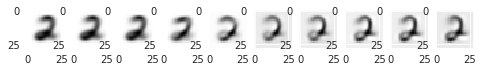

In [32]:
f = plt.figure(figsize=(8,4))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,10,1)
    plt.imshow(np.reshape(images_x1[0], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,2)
    plt.imshow(np.reshape(images_x1[1], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,3)
    plt.imshow(np.reshape(images_x1[2], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,4)
    plt.imshow(np.reshape(images_x1[3], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,5)
    plt.imshow(np.reshape(images_x1[4], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,6)
    plt.imshow(np.reshape(images_x1[5], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,7)
    plt.imshow(np.reshape(images_x1[6], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,8)
    plt.imshow(np.reshape(images_x1[7], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,9)
    plt.imshow(np.reshape(images_x1[8], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,10)
    plt.imshow(np.reshape(images_x1[9], (28,28)), cmap="Greys")

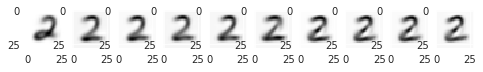

In [33]:
f = plt.figure(figsize=(8,4))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,10,1)
    plt.imshow(np.reshape(images_x0[0], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,2)
    plt.imshow(np.reshape(images_x2[1], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,3)
    plt.imshow(np.reshape(images_x2[2], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,4)
    plt.imshow(np.reshape(images_x2[3], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,5)
    plt.imshow(np.reshape(images_x2[4], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,6)
    plt.imshow(np.reshape(images_x2[5], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,7)
    plt.imshow(np.reshape(images_x2[6], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,8)
    plt.imshow(np.reshape(images_x2[7], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,9)
    plt.imshow(np.reshape(images_x2[8], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,10)
    plt.imshow(np.reshape(images_x2[9], (28,28)), cmap="Greys")

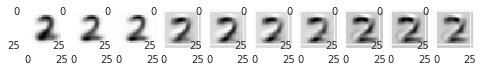

In [34]:
f = plt.figure(figsize=(8,4))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,10,1)
    plt.imshow(np.reshape(images_x3[0], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,2)
    plt.imshow(np.reshape(images_x3[1], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,3)
    plt.imshow(np.reshape(images_x3[2], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,4)
    plt.imshow(np.reshape(images_x3[3], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,5)
    plt.imshow(np.reshape(images_x3[4], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,6)
    plt.imshow(np.reshape(images_x3[5], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,7)
    plt.imshow(np.reshape(images_x3[6], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,8)
    plt.imshow(np.reshape(images_x3[7], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,9)
    plt.imshow(np.reshape(images_x3[8], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,10)
    plt.imshow(np.reshape(images_x3[9], (28,28)), cmap="Greys")

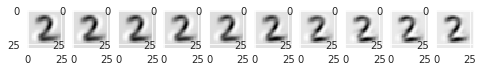

In [35]:
f = plt.figure(figsize=(8,4))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,10,1)
    plt.imshow(np.reshape(images_x4[0], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,2)
    plt.imshow(np.reshape(images_x4[1], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,3)
    plt.imshow(np.reshape(images_x4[2], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,4)
    plt.imshow(np.reshape(images_x4[3], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,5)
    plt.imshow(np.reshape(images_x4[4], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,6)
    plt.imshow(np.reshape(images_x4[5], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,7)
    plt.imshow(np.reshape(images_x4[6], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,8)
    plt.imshow(np.reshape(images_x4[7], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,9)
    plt.imshow(np.reshape(images_x4[8], (28,28)), cmap="Greys")
    ax = f.add_subplot(1,10,10)
    plt.imshow(np.reshape(images_x4[9], (28,28)), cmap="Greys")

We get the expected result is that adding principal components from m = 1,2,...10 should eventually have m = 10 have the image that most clearly resembles the original image. Choosing a proper $k$ value is all about choosing enough principal components in order to get the closest to the image features you want, while also keeping it low enough that the dimensions are not too high. In a theoretical sense, you want to be able to reduce the dimensions by cutting down on the features that don't really contribute to identifying the image (which corresponds to the later principal components). Which means that the choice of K is about how much you're willing to sacrafice of the image in order to get the dimension down to something manageable.

# 2. KNN Classification

In [47]:
#prime the set of 0,1,2,3,4's images
image_samples = []
image_labels = []
correct_samples = np.isin(labels, [0,1,2,3,4])
for i in range(0,len(labels)):
    if(correct_samples[i]):
        image_samples.append(all_images[i])
        image_labels.append(labels[i])
print(len(image_samples))
image_samples = image_samples[0:5000]
image_labels = image_labels[0:5000]
print(len(image_samples))
X = image_samples[:]
y = image_labels[:]
print(X[0].shape)

30596
5000
(784,)


In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X,y)

[4]


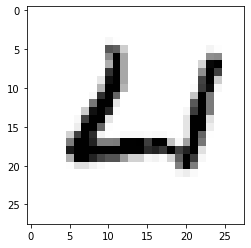

In [49]:
#test prediction
chosen = np.isin(y_test, [0,1,2,3,4])
X_test = x_test[chosen]
Y_test = y_test[chosen]
X_test = X_test[0:5000]
Y_test = Y_test[0:5000]
X_test = np.reshape(X_test, (5000, 784))
test_ = np.reshape(X_test[19], (28,28))
plt.imshow(test_, cmap="Greys")
print(knn.predict([X_test[19]]))
#congrats it did pretty good jorb

In [50]:
#get the predictions
preds = []
for i in range(0, len(Y_test)):
    preds.append(knn.predict([X_test[i]]))
print(accuracy_score(Y_test, preds))

0.9824


The KNN was able to train on the training set and achieve an accuracy of classifying with 98% accuracy on the testing set, which is pretty good. The issue here is that characters 0,1,2,3,4 are pretty distinct in terms of features. Presumably if we tossed in 7 with 1 and 6 with 0, that would make the separation a little more difficult.

In [51]:
pca = PCA(n_components=784)
pca_onX = pca.fit(X)
PC = pca_onX.components_

[0]


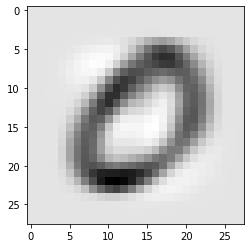

In [65]:
reconstructions = []
for i in range(5000):
    reconstructions.append(reconstruct(X[i], 10, x_bar, PC))

#testing to see if it looks good
plt.imshow(np.reshape(reconstructions[0], (28,28)), cmap="Greys")
print(knn.predict([reconstructions[0]]))

predictions_on_recon = []
for i in range(len(reconstructions)):
    predictions_on_recon.append(knn.predict([reconstructions[i]]))
acc_10pc = accuracy_score(y, predictions_on_recon)

In [67]:
reconstructions_50 = []
for i in range(5000):
    reconstructions_50.append(reconstruct(X[i], 50, x_bar, PC))

predictions_on_recon_50 = []
for i in range(len(reconstructions_50)):
    predictions_on_recon_50.append(knn.predict([reconstructions_50[i]]))
acc_50pc = accuracy_score(y, predictions_on_recon_50)

In [70]:
reconstructions_748 = []
for i in range(5000):
    reconstructions_748.append(reconstruct(X[i], 748, x_bar, PC))

predictions_on_recon_748 = []
for i in range(len(reconstructions_748)):
    predictions_on_recon_748.append(knn.predict([reconstructions_748[i]]))
acc_784pc = accuracy_score(y, predictions_on_recon_748)

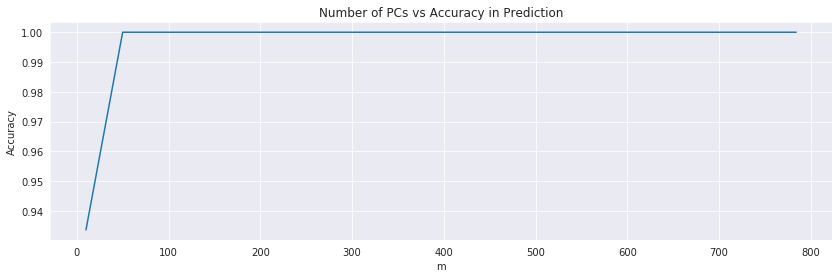

In [78]:
m = [10, 50, 784]
accs = [acc_10pc, acc_50pc, acc_784pc]
df = pd.DataFrame({"x":m, "y":accs})

f = plt.figure(figsize=(14,4))
with sb.axes_style("darkgrid"):
    ax = sb.lineplot(x="x", y="y", data=df)
    ax.title.set_text("Number of PCs vs Accuracy in Prediction")
    ax.set(xlabel="m", ylabel="Accuracy")

(I omitted some of the tests because my computer could not handle the computations, and thus the plateau is a little more extreme than it usually would be.)

However, the general idea can still be captured with the graph at hand. The idea is that you get a majority of the accuracy within the first few principal components, and adding the rest of the "weaker" principal components simply do not improve your accuracy by too much, and has the added negative effects of having too many dimensions.